# Household Finance Analysis

In [1]:
import pandas as pd
import re

df = pd.read_csv("household-finances5.csv", parse_dates=["date"], infer_datetime_format=True, dayfirst=True)
df

,date,amount,desc
0,2020-05-06,-465.13,ANZ INTERNET BANKING BPAY ORIGIN ENERGY {274447}
1,2020-08-24,-509.99,ANZ INTERNET BANKING BPAY ORIGIN ENERGY {817996}
2,2020-08-24,-1591.32,ANZ INTERNET BANKING BPAY SCC {818203}
3,2020-06-25,-313.32,ANZ INTERNET BANKING BPAY SHOALHAVEN WATER {16...
4,2020-04-17,-389.50,ANZ INTERNET BANKING BPAY SHOALHAVEN WATER {93...
...,...,...,...
715,2020-11-04,-23.10,EZI*Kemps MA South Nowra
716,2020-11-04,-109.00,MWA*TARRANTS GAS South Nowra
717,2020-11-03,-117.70,NRMA PBTM SYDNEY
718,2020-11-02,-150.65,NFM CO PTY LTD NOWRA


In [2]:
df["desc"].value_counts()

EFTPOS CALLALA BAY HOLDING\DAVIDSON AU                          80
PAYMENT TO DONNICI MP/WOOD CA                                   41
CALLALA BAY HOLDINGS CALLALA BAY                                37
EZI*Kemps MA South Nowra                                        35
CALLALA BAY HOLDINGS DAVIDSON                                   33
                                                                ..
DIVIDEND FROM TLS FNL DIV 001249794803                           1
ANZ INTERNET BANKING FUNDS TFER TRANSFER 719914 TO JILL TALB     1
BIRJEN PTY LTD BULLI                                             1
Leaf in Nowra Nowra                                              1
EFTPOS CALTEX STAR MART BOM BOMADERRY AU                         1
Name: desc, Length: 247, dtype: int64

In [3]:
df.groupby("desc").sum()

,amount
desc,
1BOMADERRY HS 8448 BOMADERRY,-195.00
AMAZON MKTPLC AU SYDNEY SOUTH,-100.64
AMPOL BOMADERRY 28861F BOMADERRY,-110.86
ANZ INTERNET BANKING BPAY GIO PI {141226},-1813.72
ANZ INTERNET BANKING BPAY ORIGIN ENERGY {274447},-465.13
...,...
WOOLWORTHS 1648 NOWRA,-10.60
WOOLWORTHS 1648 NOWRA,-101.25
WOOLWORTHS ONLINE 8843 BELLA VISTA,-1274.79


In [4]:
# tuples contain: (pattern, replacement, category)
categories = [
    # Groceries
    ("CALLALA BAY HOLDING", "IGA", "GROCERIES"), 
    ("WOOLWORTHS", "WOOLWORTHS", "GROCERIES"),
    ("COLES", "COLES", "GROCERIES"),
    ("NOWRA FARMERS MARKET", "NOWRA FRESH", "GROCERIES"), 
    ("NFM CO", "NOWRA FRESH", "GROCERIES"), 
    ("NOWRA FRESH", "NOWRA FRESH", "GROCERIES"),
    ("BAY VILLAGES MEATS", "BUTCHER", "GROCERIES"),
    ("CELLARS", "BOOZE", "GROCERIES"),
    ("BAKEHOUSE", "BAKERY", "GROCERIES"),
    
    # Eating Out
    ("SUSHI", "SUSHI", "EATING OUT"),
    
    # Activities
    ("KEMPS", "KEMPS", "ACTIVITIES"),
    ("DANCE", "DANCE", "ACTIVITIES"),
    ("BCF NOWRA", "BCF", "ACTIVITIES"),
    ("JILL TALB", "ART", "ACTIVITIES"),
    
    # Utilities
    ("ORIGIN ENERGY", "ENERGY", "UTILITIES"), 
    ("SHOALHAVEN WATER", "WATER", "UTILITIES"), 
    ("TARRANTS GAS", "GAS", "UTILITIES"), 
    ("Telstra", "TELSTRA", "UTILITIES"), 
    
    # Health
    ("PHARMACY", "PHARMACY", "HEALTH"),
    ("CHEMIST", "PHARMACY", "HEALTH"), 
    ("HEALTH", "HEALTH", "HEALTH"),
    ("GO VITA", "NATUROPATH", "HEALTH"),
    ("SAMANTHA FARL", "NATUROPATH", "HEALTH"),
    ("TRANSFER FROM ALLIANZ", "HEALTH", "HEALTH"),
    ("TRANSFER FROM MCARE", "HEALTH", "HEALTH"),
    ("TRANSFER FROM AAI", "HEALTH", "HEALTH"),
    ("MEDICAL", "HEALTH", "HEALTH"),
    ("GUMMY BEARS", "DENTAL", "HEALTH"),
    ("CALVIN HSIEH", "CARDIOLOGIST", "HEALTH"),
    
    # Dog
    ("VETERINARY", "VET", "DOG"),
    ("PARADISE PET PARKS", "KENNEL", "DOG"),
    ("PETBARN", "FEED", "DOG"),
    
    # General Household
    ("JOYCE MAYNE", "JOYCE MAYNE", "HOUSEHOLD"),
    ("HARVEY NORMAN", "HARVEY NORMAN", "HOUSEHOLD"),
    ("KMART", "KMART", "HOUSEHOLD"),
    ("TARGET", "TARGET", "HOUSEHOLD"),
    ("OFFICEWORKS", "OFFICEWORKS", "HOUSEHOLD"),
    ("OFWKS", "OFFICEWORKS", "HOUSEHOLD"),
    ("GOOGLE", "GOOGLE", "HOUSEHOLD"),
    ("SPOTIFY", "SPOTIFY", "HOUSEHOLD"),
    ("WINNING", "APPLIANCES", "HOUSEHOLD"),
    ("BUNNINGS", "HARDWARE", "HOUSEHOLD"),
    ("APPLIANCES", "APPLIANCES", "HOUSEHOLD"),
    ("BOOKTOPIA", "BOOKS", "HOUSEHOLD"),
    ("HAVAIANAS", "THONGS", "HOUSEHOLD"),    
    ("BONDS", "CLOTHING", "HOUSEHOLD"),    
    ("APPLE ONLINE", "COMPUTERS", "HOUSEHOLD"),    
    ("SHOALHAVEN HOT WATER", "OVEN REPAIR", "HOUSEHOLD"),
    ("GIO", "HOUSE INSURANCE", "HOUSEHOLD"),    
    
        
    # Cars
    ("NRMA", "NRMA", "CARS"),
    ("CALTEX", "FUEL", "CARS"),
    ("EFTPOS UNITED", "FUEL", "CARS"),
    ("BP STH NOWRA", "FUEL", "CARS"),
    ("AMPOL", "FUEL", "CARS"),
    ("MOBIL", "FUEL", "CARS"),
    ("PETROLEUM", "FUEL", "CARS"),
    ("GIO CTP", "GIO", "CARS"),
    ("SERVICE NSW", "SERVICE NSW", "CARS"),
    ("CONLEY", "MECHANIC", "CARS"),
    ("KINGHORN", "MECHANIC", "CARS"),
    
    # Mortgage
    ("PAYMENT TO DONNICI MP", "MORTGAGE", "MORTGAGE"),
    
    # Income
    ("DET SALARY", "CW INCOME", "INCOME"),
    ("TRANSFER FROM MICHAEL DONNICI", "MD INCOME", "INCOME"),
    ("MCARE BENEFITS", "MEDICARE", "INCOME"),
]

df["category"] = pd.Series(dtype="str")
for cat in categories:
    rgx = fr"(?=.*{cat[0]}.*)(.*)"
    s = df["desc"].str.replace(rgx, cat[1], flags=re.I)
    df["desc"] = s.combine_first(df["desc"])
    df.loc[df["desc"] == cat[1], "category"] = cat[2]
    
df.groupby("category").sum().abs()

<ipython-input-4-76b601b0f5d0>:92: FutureWarning: The default value of regex will change from True to False in a future version.
  s = df["desc"].str.replace(rgx, cat[1], flags=re.I)


,amount
category,
ACTIVITIES,2802.17
CARS,3709.45
DOG,375.89
EATING OUT,170.34
GROCERIES,15052.78
HEALTH,6856.36
HOUSEHOLD,11789.14
INCOME,88900.00
MORTGAGE,26650.00


In [5]:
df

,date,amount,desc,category
0,2020-05-06,-465.13,ENERGY,UTILITIES
1,2020-08-24,-509.99,ENERGY,UTILITIES
2,2020-08-24,-1591.32,ANZ INTERNET BANKING BPAY SCC {818203},NaN
3,2020-06-25,-313.32,WATER,UTILITIES
4,2020-04-17,-389.50,WATER,UTILITIES
...,...,...,...,...
715,2020-11-04,-23.10,KEMPS,ACTIVITIES
716,2020-11-04,-109.00,GAS,UTILITIES
717,2020-11-03,-117.70,NRMA,CARS
718,2020-11-02,-150.65,NOWRA FRESH,GROCERIES


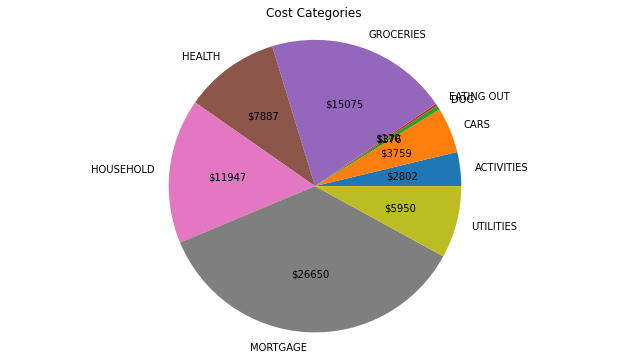

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plotdf = df[df["amount"]<0].groupby("category").sum().abs()
values = plotdf["amount"]
labels = plotdf.index
amount_sum = plotdf["amount"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
plt.title('Cost Categories')
plt.show()

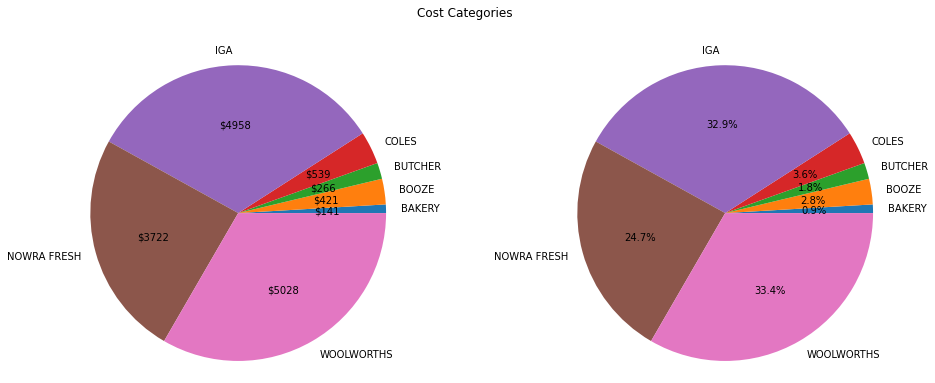

In [7]:
# Groceries breakdown by source
filter = (df["amount"] < 0) & (df["category"] == "GROCERIES")
plotdf = df[filter].groupby("desc").sum().abs()
values = plotdf["amount"]
labels = plotdf.index
amount_sum = plotdf["amount"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16, 6))
fig1.suptitle('Cost Categories')
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
ax2.pie(values, labels=plotdf.index, autopct="%1.1f%%")
ax2.axis('equal')

plt.show()


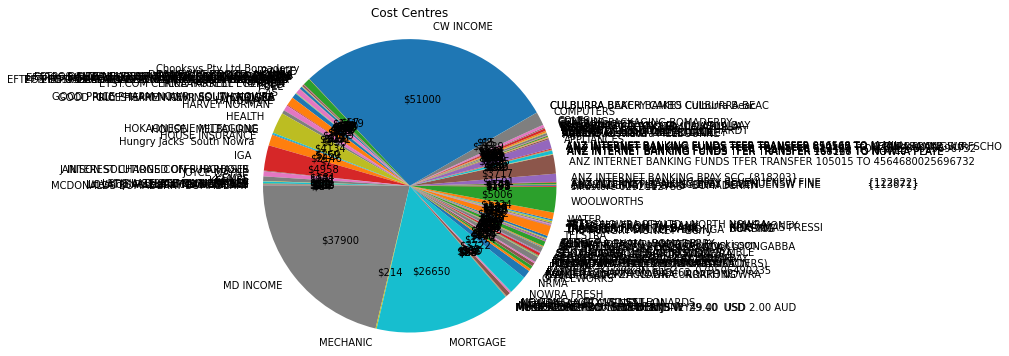

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plotdf = df.groupby("desc").sum().abs()
values = plotdf["amount"]
labels = plotdf.index
amount_sum = plotdf["amount"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
plt.title('Cost Centres')
plt.show()

In [9]:
df["in"] = df[df["amount"] > 0]["amount"]
df["out"] = df[df["amount"] < 0]["amount"]
cat_df = df.groupby("category").sum().abs()
cat_df
# df.groupby("date").sum()["amount"].plot.line()

,amount,in,out
category,,,
ACTIVITIES,2802.17,0.00,2802.17
CARS,3709.45,49.95,3759.40
DOG,375.89,0.00,375.89
EATING OUT,170.34,0.00,170.34
GROCERIES,15052.78,22.49,15075.27
HEALTH,6856.36,1030.42,7886.78
HOUSEHOLD,11789.14,158.20,11947.34
INCOME,88900.00,88900.00,0.00
MORTGAGE,26650.00,0.00,26650.00


In [10]:
sorted_df = df.sort_values("date")
td = sorted_df["date"].iloc[-1] - sorted_df["date"].iloc[0]
cat_df["weekly"] = (cat_df["amount"] / td.days) * 7
cat_df

,amount,in,out,weekly
category,,,,
ACTIVITIES,2802.17,0.00,2802.17,54.185608
CARS,3709.45,49.95,3759.40,71.729696
DOG,375.89,0.00,375.89,7.268591
EATING OUT,170.34,0.00,170.34,3.293867
GROCERIES,15052.78,22.49,15075.27,291.075856
HEALTH,6856.36,1030.42,7886.78,132.581547
HOUSEHOLD,11789.14,158.20,11947.34,227.966796
INCOME,88900.00,88900.00,0.00,1719.060773
MORTGAGE,26650.00,0.00,26650.00,515.331492


In [11]:
income = cat_df['in'].sum()
costs = cat_df['out'].sum()

print(f"Income: {income} ")
print(f"Costs: {costs} ")
print(f"Net: {income - costs} ")

Income: 90161.06 
Costs: 74617.46999999999 
Net: 15543.590000000011 


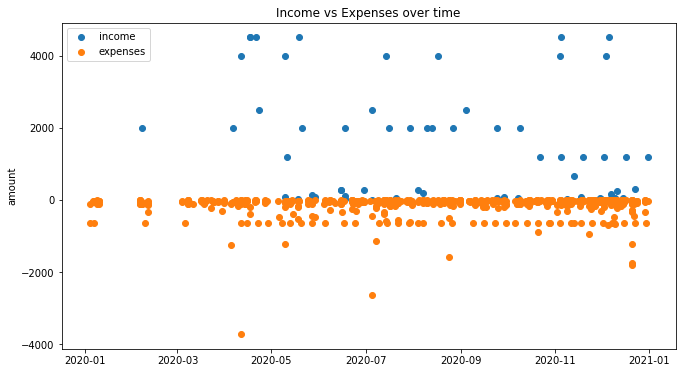

In [12]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.scatter(df["date"], df["in"], label = "income")
ax1.scatter(df["date"], df["out"], label = "expenses")
plt.ylabel('amount')
plt.title('Income vs Expenses over time')
plt.legend()
plt.show()

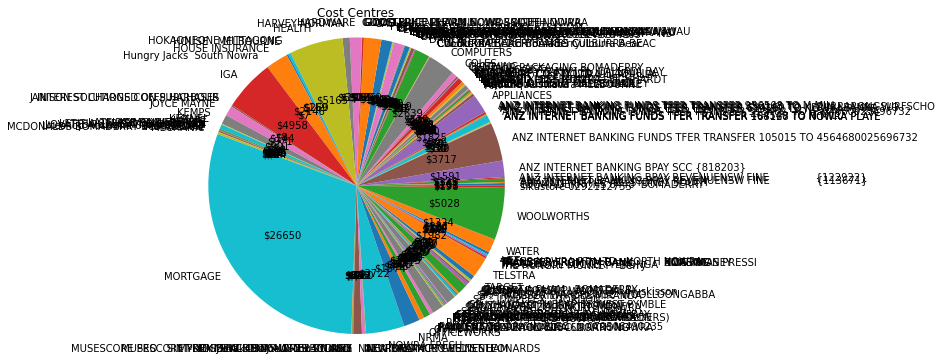

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plotdf = df.groupby("desc").sum().abs()
values = plotdf["out"]
labels = plotdf.index
amount_sum = plotdf["out"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
plt.title('Cost Centres')
plt.show()

In [14]:
df[df["in"]>0].groupby("desc").sum()

,amount,in,out
desc,,,
1BOMADERRY HS 8448 BOMADERRY,60.00,60.00,0.0
CW INCOME,51000.00,51000.00,0.0
DIVIDEND FROM TLS FNL DIV 001249794803,45.44,45.44,0.0
FUEL,49.95,49.95,0.0
HARDWARE,100.20,100.20,0.0
HEALTH,1030.42,1030.42,0.0
KMART,40.00,40.00,0.0
LATE PAYMENT FEE REV,20.00,20.00,0.0
MD INCOME,37900.00,37900.00,0.0


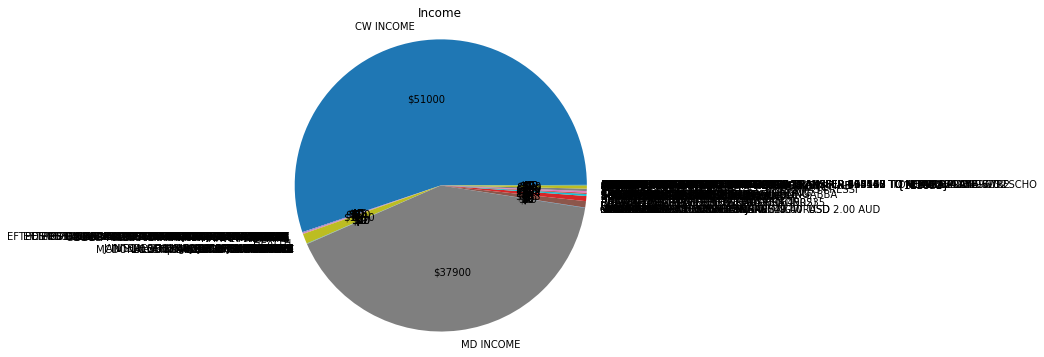

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plotdf = df.groupby("desc").sum().abs()
values = plotdf["in"]
labels = plotdf.index
amount_sum = plotdf["in"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
plt.title('Income')
plt.show()